# Práctica 2: Clasificación y evaluación de modelos
Duración: 2 sesiones

Apartado 2.1: Comparación de modelos

Objetivo: El objetivo de esta práctica es introducir los conceptos de clasificación usando diferentes métodos como árboles de decisión, k vecinos más cercanos y máquinas de vectores soporte (SVM) y de evaluación y comparación de modelos.

Se tratará, por tanto, de ejecutar diferentes modelos y comparar sus resultados.
Realice los siguientes ejercicios usando el módulo scikit-learn de Python y cualquier otro módulo adicional que considere:

1. Obtenga al menos 10 conjuntos de datos en formato CSV, ARFF u otro cualquiera de:
 * Weka datasets
 * UCI MLR
2. Seleccione al menos 3 clasificadores dentro de los disponibles en Scikit. Se recomienda elegir tres de entre los siguientes: árboles de decisión, k vecinos más cercanos, máquinas de vectores soporte y clasificador Naïve de
Bayes.

3. Para cada uno de los problemas seleccionados realice las siguientes tareas:
 * Seleccione como método para obtener el error la validación cruzada de 10 particiones o el método hold out.
Seleccione dos métricas de las estudiadas en teoría.
 * Entrene cada clasificador seleccionado y anote el valor de las métricas estudiadas. Fije los hiperparámetros de
forma razonable.

4. Use el test de Wilcoxon de comparación de dos algoritmos sobre N problemas y aplíquelo a dos de los algoritmos anteriores. Obtenga el rango de Friedman para cada clasificador y configuración y represente gráficamente los resultados. Aplique el test de Iman-Davenport sobre los tres clasificadores1.

5. Compare el mejor método según el rango medio de Friedman con el resto de métodos usando el procedimiento de Holm.

6. Compare los métodos por parejas usando el procedimiento de Bonferroni-Dunn.

7. Para uno de los clasificadores elegidos utilice una validación de los hiperparámetros con grid search y compare
su rendimiento con el método con hiperparámetros fijados a priori.
8. Elija dos métodos de clasificación y compare sus resultados usando ahora el método de hold out con una
distribución de 66% para entrenamiento y 33% para test. ¿Son diferentes los resultados con respecto al uso de la
validación cruzada?
9. Seleccione un problema de dos clases y dos clasificadores. Construya la curva ROC de ambos clasificadores y
obtenga el área bajo la curva en ambos casos.
10. Realice el test de Nemenyi para los 10 datasest y los tres modelos. Presente gráficamente los resultados y
comentelos.

NOTAS:
* Los ejercicios marcados con un * son opcionales.

* No use combinaciones (ensembles) de modelos que serán objeto de una práctica posterior.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import time
!pip install scipy
!pip install -U scikit-learn
!pip install wittgenstein
!pip install sklearn-evaluation
!pip install seaborn
!pip install imblearn
!pip install imbalanced-learn

In [18]:
!pip install -U imbalanced-learn

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, svm, neighbors
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score

data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

data = arff.loadarff('vehicle.arff')
df_Vehicle = pd.DataFrame(data[0])

data = arff.loadarff('vowel.arff')
df_vowel = pd.DataFrame(data[0])

data = arff.loadarff('tae.arff')
df_tae = pd.DataFrame(data[0])

data = arff.loadarff('sonar.arff')
df_sonar = pd.DataFrame(data[0])

data = arff.loadarff('spambase.arff')
df_spambase = pd.DataFrame(data[0])

data = arff.loadarff('page_blocks.arff')
df_page = pd.DataFrame(data[0])

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('letter.arff')
df_letter = pd.DataFrame(data[0])
# Changing the last categorical class value into a numerical value
df_iono['class'] = pd.factorize(df_iono['class'])[0]
df_iono.head()
# Changing the last categorical class value into a numerical value
df_diabe['class'] = pd.factorize(df_diabe['class'])[0]
df_diabe.head()
# Changing the last categorical class value into a numerical value
df_Vehicle['Class'] = pd.factorize(df_Vehicle['Class'])[0]
df_Vehicle.head()
# Changing the last categorical class value into a numerical value
df_vowel['Class'] = pd.factorize(df_vowel['Class'])[0]
df_vowel.head()
# Changing the last categorical class value into a numerical value
df_tae['Class_attribute'] = pd.factorize(df_tae['Class_attribute'])[0]
df_tae.head()
# Changing the last categorical class value into a numerical value
df_sonar['Class'] = pd.factorize(df_sonar['Class'])[0]
df_sonar.head()
# Changing the last categorical class value into a numerical value
df_spambase['class'] = pd.factorize(df_spambase['class'])[0]
df_spambase.head()
# Changing the last categorical class value into a numerical value
df_page['Class'] = pd.factorize(df_page['Class'])[0]
df_page.head()
# Changing the last categorical class value into a numerical value
df_iris['class'] = pd.factorize(df_iris['class'])[0]
df_iris.head()
# Changing the last categorical class value into a numerical value
df_letter['class'] = pd.factorize(df_letter['class'])[0]

In [2]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

def make_10_fold_decision_tree(x, y, current_table, dataset_str):
    kf = KFold(n_splits=10)

    mean_f1 = []
    mean_of_geometric_mean = []

    for i, (train_index, test_index) in enumerate(kf.split(x, y)):
        train_x, test_x = x[train_index], x[test_index]
        train_y, test_y = y[train_index], y[test_index]

        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(train_x, train_y)

        pred_y = clf.predict(test_x)
        mean_f1.append(f1_score(test_y, pred_y, average="micro"))
        mean_of_geometric_mean.append(geometric_mean_score(test_y, pred_y, average="micro"))

    current_table[dataset_str][0] = np.mean(mean_f1)
    current_table[dataset_str][1] = np.mean(mean_of_geometric_mean)

In [3]:
tree_table = {
    "Ionosphere": [0, 0],
    "Diabetes": [0, 0],
    "Vehicle": [0, 0],
    "Vowel": [0, 0],
    "Tae": [0, 0],
    "Sonar": [0, 0],
    "Spambase": [0, 0],
    "Page blocks": [0, 0],
    "Iris": [0, 0],
    "Letter": [0, 0]
}

In [4]:
make_10_fold_decision_tree(df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values, tree_table, "Diabetes")
make_10_fold_decision_tree(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -1].values, tree_table, "Iris")
make_10_fold_decision_tree(df_iono.iloc[:, 0:-2].values, df_iono.iloc[:, -1].values, tree_table, "Ionosphere")
make_10_fold_decision_tree(df_Vehicle.iloc[:, 0:-2].values, df_Vehicle.iloc[:, -1].values, tree_table, "Vehicle")
make_10_fold_decision_tree(df_vowel.iloc[:, 0:-2].values, df_vowel.iloc[:, -1].values, tree_table, "Vowel")
make_10_fold_decision_tree(df_tae.iloc[:, 0:-2].values, df_tae.iloc[:, -1].values, tree_table, "Tae")
make_10_fold_decision_tree(df_sonar.iloc[:, 0:-2].values, df_sonar.iloc[:, -1].values, tree_table, "Sonar")
make_10_fold_decision_tree(df_spambase.iloc[:, 0:-2].values, df_spambase.iloc[:, -1].values, tree_table, "Spambase")
make_10_fold_decision_tree(df_page.iloc[:, 0:-2].values, df_page.iloc[:, -1].values, tree_table, "Page blocks")
make_10_fold_decision_tree(df_letter.iloc[:, 0:-2].values, df_letter.iloc[:, -1].values, tree_table, "Letter")

print(pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).head())
print(pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


            F1-score  Geometric mean
Ionosphere  0.880397        0.880397
Diabetes    0.700513        0.700513
Vehicle     0.933824        0.933824
Vowel       0.954504        0.954504
Tae         0.508333        0.606314
\begin{tabular}{lrr}
\toprule
{} &  F1-score &  Geometric mean \\
\midrule
Ionosphere  &  0.880397 &        0.880397 \\
Diabetes    &  0.700513 &        0.700513 \\
Vehicle     &  0.933824 &        0.933824 \\
Vowel       &  0.954504 &        0.954504 \\
Tae         &  0.508333 &        0.606314 \\
Sonar       &  0.501667 &        0.501667 \\
Spambase    &  0.865043 &        0.865043 \\
Page blocks &  0.955411 &        0.955411 \\
Iris        &  0.906667 &        0.608319 \\
Letter      &  0.875900 &        0.933563 \\
\bottomrule
\end{tabular}



<ipython-input-4-a81c6e21d42b>:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())


In [5]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

def make_10_fold_svm(x, y, current_table, dataset_str):
    kf = KFold(n_splits=10)

    mean_f1 = []
    mean_of_geometric_mean = []

    for i, (train_index, test_index) in enumerate(kf.split(x, y)):
        train_x, test_x = x[train_index], x[test_index]
        train_y, test_y = y[train_index], y[test_index]

        clf = SVC(random_state=0)
        clf.fit(train_x, train_y)

        pred_y = clf.predict(test_x)
        mean_f1.append(f1_score(test_y, pred_y, average="micro"))
        mean_of_geometric_mean.append(geometric_mean_score(test_y, pred_y, average="micro"))

    current_table[dataset_str][0] = np.mean(mean_f1)
    current_table[dataset_str][1] = np.mean(mean_of_geometric_mean)

In [6]:
svm_table = {
    "Ionosphere": [0, 0],
    "Diabetes": [0, 0],
    "Vehicle": [0, 0],
    "Vowel": [0, 0],
    "Tae": [0, 0],
    "Sonar": [0, 0],
    "Spambase": [0, 0],
    "Page blocks": [0, 0],
    "Iris": [0, 0],
    "Letter": [0, 0]
}

In [7]:
make_10_fold_svm(df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values, svm_table, "Diabetes")
make_10_fold_svm(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -1].values, svm_table, "Iris")
make_10_fold_svm(df_iono.iloc[:, 0:-2].values, df_iono.iloc[:, -1].values, svm_table, "Ionosphere")
make_10_fold_svm(df_Vehicle.iloc[:, 0:-2].values, df_Vehicle.iloc[:, -1].values, svm_table, "Vehicle")
make_10_fold_svm(df_vowel.iloc[:, 0:-2].values, df_vowel.iloc[:, -1].values, svm_table, "Vowel")
make_10_fold_svm(df_tae.iloc[:, 0:-2].values, df_tae.iloc[:, -1].values, svm_table, "Tae")
make_10_fold_svm(df_sonar.iloc[:, 0:-2].values, df_sonar.iloc[:, -1].values, svm_table, "Sonar")
make_10_fold_svm(df_spambase.iloc[:, 0:-2].values, df_spambase.iloc[:, -1].values, svm_table, "Spambase")
make_10_fold_svm(df_page.iloc[:, 0:-2].values, df_page.iloc[:, -1].values, svm_table, "Page blocks")
make_10_fold_svm(df_letter.iloc[:, 0:-2].values, df_letter.iloc[:, -1].values, svm_table, "Letter")

print(svm_table)
print(pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).head())
print(pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classifica

{'Ionosphere': [0.9373809523809523, 0.9373809523809523], 'Diabetes': [0.7603896103896105, 0.7603896103896105], 'Vehicle': [0.7956022408963586, 0.7956022408963586], 'Vowel': [0.9484023912595341, 0.9484023912595341], 'Tae': [0.18583333333333335, 0.29361698304352923], 'Sonar': [0.45285714285714285, 0.45285714285714285], 'Spambase': [0.7129524662831275, 0.7129524662831275], 'Page blocks': [0.9022438249776485, 0.8022438249776485], 'Iris': [0.9, 0.6016520456585], 'Letter': [0.9105000000000001, 0.9524854243963723]}
            F1-score  Geometric mean
Ionosphere  0.937381        0.937381
Diabetes    0.760390        0.760390
Vehicle     0.795602        0.795602
Vowel       0.948402        0.948402
Tae         0.185833        0.293617
\begin{tabular}{lrr}
\toprule
{} &  F1-score &  Geometric mean \\
\midrule
Ionosphere  &  0.937381 &        0.937381 \\
Diabetes    &  0.760390 &        0.760390 \\
Vehicle     &  0.795602 &        0.795602 \\
Vowel       &  0.948402 &        0.948402 \\
Tae      

<ipython-input-7-2bc55173b2eb>:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())


In [8]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

def make_10_fold_knn(x, y, current_table, dataset_str):
    kf = KFold(n_splits=10)

    mean_f1 = []
    mean_of_geometric_mean = []

    for i, (train_index, test_index) in enumerate(kf.split(x, y)):
        train_x, test_x = x[train_index], x[test_index]
        train_y, test_y = y[train_index], y[test_index]

        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_x, train_y)

        pred_y = clf.predict(test_x)
        mean_f1.append(f1_score(test_y, pred_y, average="micro"))
        mean_of_geometric_mean.append(geometric_mean_score(test_y, pred_y, average="micro"))

    current_table[dataset_str][0] = np.mean(mean_f1)
    current_table[dataset_str][1] = np.mean(mean_of_geometric_mean)

In [9]:
knn_table = {
    # ROW
    "Ionosphere": [0, 0], # COL
    "Diabetes": [0, 0],
    "Vehicle": [0, 0],
    "Vowel": [0, 0],
    "Tae": [0, 0],
    "Sonar": [0, 0],
    "Spambase": [0, 0],
    "Page blocks": [0, 0],
    "Iris": [0, 0],
    "Letter": [0, 0]
}

In [10]:
make_10_fold_knn(df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values, knn_table, "Diabetes")
make_10_fold_knn(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -1].values, knn_table, "Iris")
make_10_fold_knn(df_iono.iloc[:, 0:-2].values, df_iono.iloc[:, -1].values, knn_table, "Ionosphere")
make_10_fold_knn(df_Vehicle.iloc[:, 0:-2].values, df_Vehicle.iloc[:, -1].values, knn_table, "Vehicle")
make_10_fold_knn(df_vowel.iloc[:, 0:-2].values, df_vowel.iloc[:, -1].values, knn_table, "Vowel")
make_10_fold_knn(df_tae.iloc[:, 0:-2].values, df_tae.iloc[:, -1].values, knn_table, "Tae")
make_10_fold_knn(df_sonar.iloc[:, 0:-2].values, df_sonar.iloc[:, -1].values, knn_table, "Sonar")
make_10_fold_knn(df_spambase.iloc[:, 0:-2].values, df_spambase.iloc[:, -1].values, knn_table, "Spambase")
make_10_fold_knn(df_page.iloc[:, 0:-2].values, df_page.iloc[:, -1].values, knn_table, "Page blocks")
make_10_fold_knn(df_letter.iloc[:, 0:-2].values, df_letter.iloc[:, -1].values, knn_table, "Letter")

print(pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).head())
print(pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


            F1-score  Geometric mean
Ionosphere  0.829286        0.829286
Diabetes    0.709569        0.709569
Vehicle     0.933852        0.933852
Vowel       0.955525        0.955525
Tae         0.449167        0.563544
\begin{tabular}{lrr}
\toprule
{} &  F1-score &  Geometric mean \\
\midrule
Ionosphere  &  0.829286 &        0.829286 \\
Diabetes    &  0.709569 &        0.709569 \\
Vehicle     &  0.933852 &        0.933852 \\
Vowel       &  0.955525 &        0.955525 \\
Tae         &  0.449167 &        0.563544 \\
Sonar       &  0.403571 &        0.403571 \\
Spambase    &  0.849614 &        0.849614 \\
Page blocks &  0.953399 &        0.953399 \\
Iris        &  0.906667 &        0.606667 \\
Letter      &  0.945350 &        0.971226 \\
\bottomrule
\end{tabular}



<ipython-input-10-4fc1847e212c>:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())


In [11]:
from scipy.stats import wilcoxon

df_knn = pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_svm = pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_tree = pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})

diff_f1 = df_tree['F1-score'] - df_svm['F1-score']
diff_gmean = df_tree['Geometric mean'] - df_svm['Geometric mean']

print("Tree VS SVM")

# Compute the Wilcoxon test
_, p = wilcoxon(diff_f1)

print(p)

# Compute the Wilcoxon test
_, p = wilcoxon(diff_gmean)

print(p)

Tree VS SVM
0.275390625
0.193359375


In [12]:
from scipy.stats import wilcoxon

df_knn = pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_svm = pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_tree = pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})

diff_f1 = df_tree['F1-score'] - df_knn['F1-score']
diff_gmean = df_tree['Geometric mean'] - df_knn['Geometric mean']

print("Tree VS KNN")

# Compute the Wilcoxon test
_, p = wilcoxon(diff_f1)

print(p)

# Compute the Wilcoxon test
_, p = wilcoxon(diff_gmean)

print(p)

Tree VS KNN
0.4921875
0.232421875


In [13]:
from scipy.stats import wilcoxon

df_knn = pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_svm = pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_tree = pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})

diff_f1 = df_svm['F1-score'] - df_knn['F1-score']
diff_gmean = df_svm['Geometric mean'] - df_knn['Geometric mean']

print("SVM vs KNN")

# Compute the Wilcoxon test
_, p = wilcoxon(diff_f1)

print(p)

# Compute the Wilcoxon test
_, p = wilcoxon(diff_gmean)

print(p)

SVM vs KNN
0.275390625
0.232421875


In [14]:
from scipy.stats import friedmanchisquare

friedman_test = friedmanchisquare(df_tree['F1-score'], df_svm['F1-score'], df_knn['F1-score'])

print(friedman_test)

FriedmanchisquareResult(statistic=2.4000000000000057, pvalue=0.3011942119122012)


In [15]:
#print(f"SVM ------> \n{df_svm['F1-score'].head(n=10)}")
#print(f"KNN ------> \n{df_knn['F1-score'].head(n=10)}")
#print(f"TREE ------> \n{df_tree['F1-score'].head(n=10)}")
from scipy.stats import rankdata

ranks = {
    "Ionosphere": [0, 0, 0], # COL
    "Diabetes": [0, 0, 0], # COL
    "Vehicle": [0, 0, 0], # COL
    "Vowel": [0, 0, 0], # COL
    "Tae": [0, 0, 0], # COL
    "Sonar": [0, 0, 0], # COL
    "Spambase": [0, 0, 0], # COL
    "Page blocks": [0, 0, 0], # COL
    "Iris": [0, 0, 0], # COL
    "Letter": [0, 0, 0], # COL
}

for index, (current_svm_value, current_knn_value, current_tree_value) in enumerate(zip(df_svm["F1-score"].values, df_knn["F1-score"].values, df_tree["F1-score"].values)):

    current_values = [current_svm_value, current_knn_value, current_tree_value]
    current_ranking = rankdata(current_values)

    ranks[list(ranks.keys())[index]] = current_ranking

print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).head(n=10))
print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).to_latex())

df_ranks = pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"})

             SVM  KNN  Tree
Ionosphere   3.0  1.0   2.0
Diabetes     3.0  2.0   1.0
Vehicle      1.0  3.0   2.0
Vowel        1.0  3.0   2.0
Tae          1.0  2.0   3.0
Sonar        2.0  1.0   3.0
Spambase     1.0  2.0   3.0
Page blocks  1.0  2.0   3.0
Iris         1.0  3.0   2.0
Letter       2.0  3.0   1.0
\begin{tabular}{lrrr}
\toprule
{} &  SVM &  KNN &  Tree \\
\midrule
Ionosphere  &  3.0 &  1.0 &   2.0 \\
Diabetes    &  3.0 &  2.0 &   1.0 \\
Vehicle     &  1.0 &  3.0 &   2.0 \\
Vowel       &  1.0 &  3.0 &   2.0 \\
Tae         &  1.0 &  2.0 &   3.0 \\
Sonar       &  2.0 &  1.0 &   3.0 \\
Spambase    &  1.0 &  2.0 &   3.0 \\
Page blocks &  1.0 &  2.0 &   3.0 \\
Iris        &  1.0 &  3.0 &   2.0 \\
Letter      &  2.0 &  3.0 &   1.0 \\
\bottomrule
\end{tabular}



<ipython-input-15-80e5128fd2bf>:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).to_latex())


['Ionosphere' 'Diabetes' 'Vehicle' 'Vowel' 'Tae' 'Sonar' 'Spambase'
 'Page blocks' 'Iris' 'Letter']


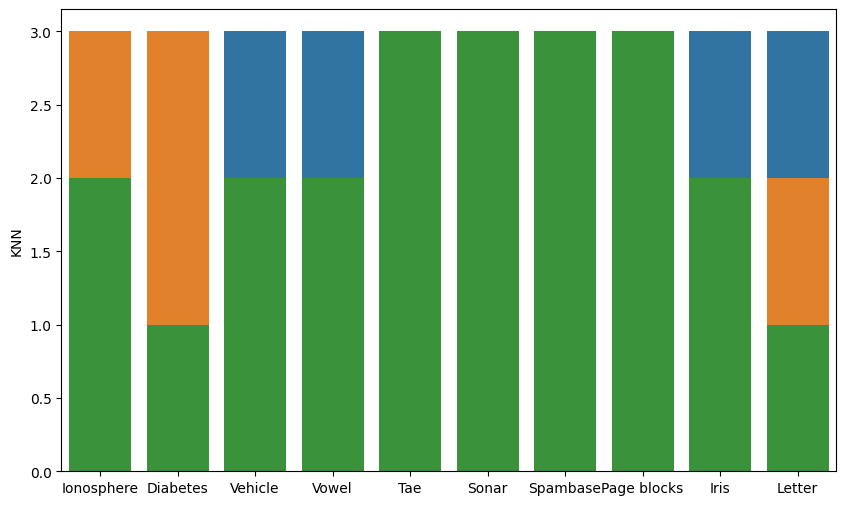

In [16]:
import seaborn as sns

print(df_ranks.index.values)

fig, ax = plt.subplots(figsize=(10, 6))

ax_1 = sns.barplot(data=df_ranks, x=df_ranks.index.values, y="KNN")
ax_2 = sns.barplot(data=df_ranks, x=df_ranks.index.values, y="SVM")
ax_3 = sns.barplot(data=df_ranks, x=df_ranks.index.values, y="Tree")
plt.show()

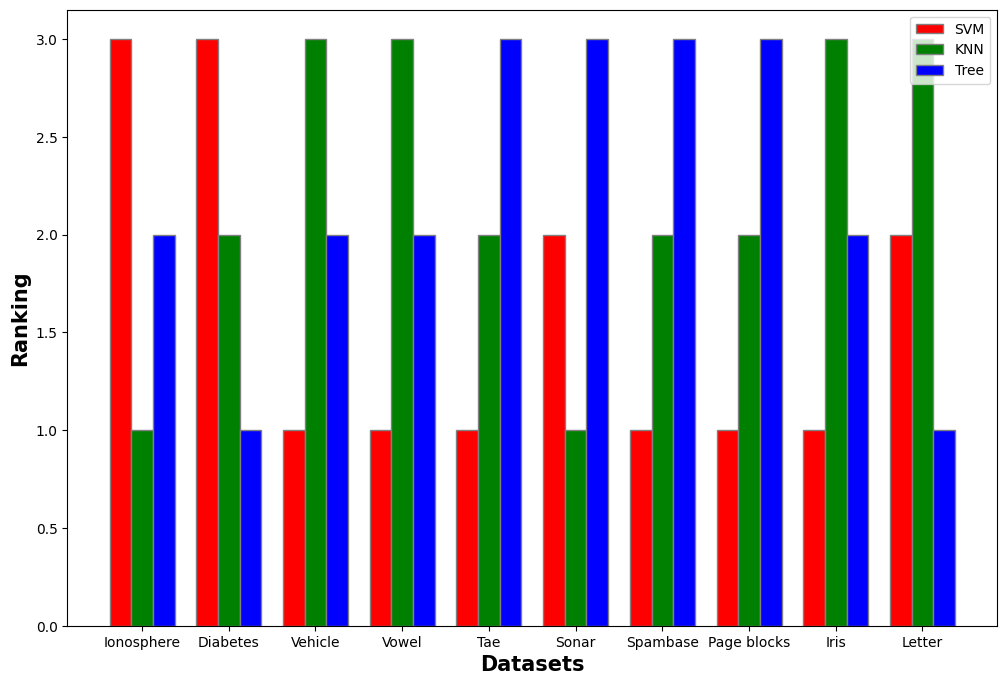

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = df_ranks['SVM'].values
ECE = df_ranks['KNN'].values
CSE = df_ranks['Tree'].values

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
		edgecolor ='grey', label ='SVM')
plt.bar(br2, ECE, color ='g', width = barWidth,
		edgecolor ='grey', label ='KNN')
plt.bar(br3, CSE, color ='b', width = barWidth,
		edgecolor ='grey', label ='Tree')

# Adding Xticks
plt.xlabel('Datasets', fontweight ='bold', fontsize = 15)
plt.ylabel('Ranking', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
		df_ranks.index.values)

plt.legend()
plt.show()

In [18]:
#print(f"SVM ------> \n{df_svm['F1-score'].head(n=10)}")
#print(f"KNN ------> \n{df_knn['F1-score'].head(n=10)}")
#print(f"TREE ------> \n{df_tree['F1-score'].head(n=10)}")
from scipy.stats import rankdata

ranks = {
    "Ionosphere": [0, 0, 0], # COL
    "Diabetes": [0, 0, 0], # COL
    "Vehicle": [0, 0, 0], # COL
    "Vowel": [0, 0, 0], # COL
    "Tae": [0, 0, 0], # COL
    "Sonar": [0, 0, 0], # COL
    "Spambase": [0, 0, 0], # COL
    "Page blocks": [0, 0, 0], # COL
    "Iris": [0, 0, 0], # COL
    "Letter": [0, 0, 0], # COL
}

for index, (current_svm_value, current_knn_value, current_tree_value) in enumerate(zip(df_svm["Geometric mean"].values, df_knn["Geometric mean"].values, df_tree["Geometric mean"].values)):

    current_values = [current_svm_value, current_knn_value, current_tree_value]
    current_ranking = rankdata(current_values)

    ranks[list(ranks.keys())[index]] = current_ranking

print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).head(n=10))
print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).to_latex())

df_ranks = pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"})

             SVM  KNN  Tree
Ionosphere   3.0  1.0   2.0
Diabetes     3.0  2.0   1.0
Vehicle      1.0  3.0   2.0
Vowel        1.0  3.0   2.0
Tae          1.0  2.0   3.0
Sonar        2.0  1.0   3.0
Spambase     1.0  2.0   3.0
Page blocks  1.0  2.0   3.0
Iris         1.0  2.0   3.0
Letter       2.0  3.0   1.0
\begin{tabular}{lrrr}
\toprule
{} &  SVM &  KNN &  Tree \\
\midrule
Ionosphere  &  3.0 &  1.0 &   2.0 \\
Diabetes    &  3.0 &  2.0 &   1.0 \\
Vehicle     &  1.0 &  3.0 &   2.0 \\
Vowel       &  1.0 &  3.0 &   2.0 \\
Tae         &  1.0 &  2.0 &   3.0 \\
Sonar       &  2.0 &  1.0 &   3.0 \\
Spambase    &  1.0 &  2.0 &   3.0 \\
Page blocks &  1.0 &  2.0 &   3.0 \\
Iris        &  1.0 &  2.0 &   3.0 \\
Letter      &  2.0 &  3.0 &   1.0 \\
\bottomrule
\end{tabular}



<ipython-input-18-e1d8ff62e68f>:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).to_latex())


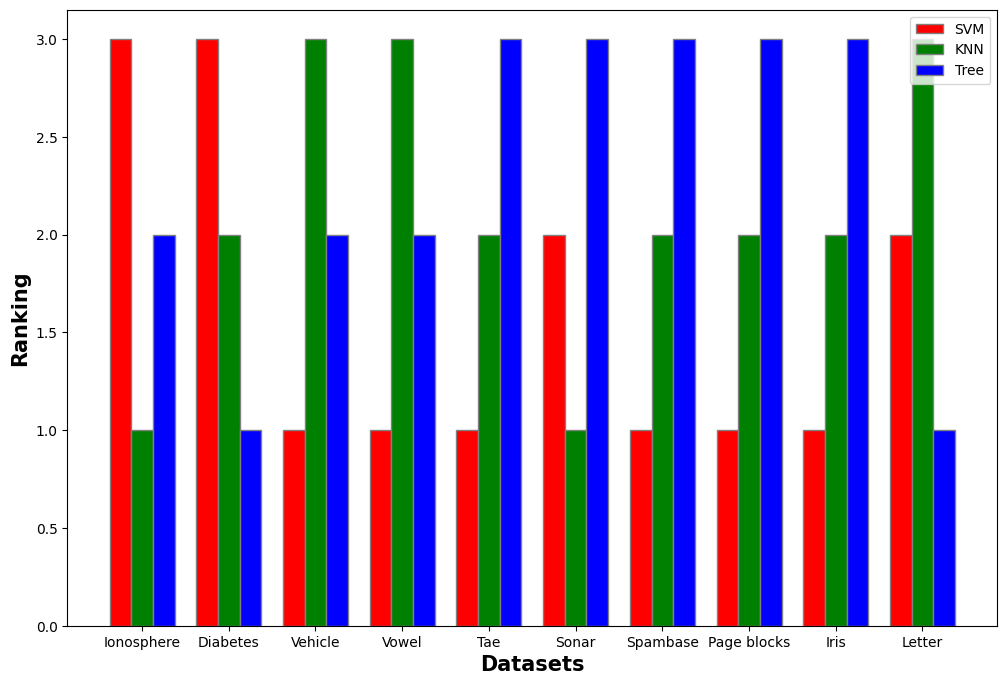

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = df_ranks['SVM'].values
ECE = df_ranks['KNN'].values
CSE = df_ranks['Tree'].values

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
		edgecolor ='grey', label ='SVM')
plt.bar(br2, ECE, color ='g', width = barWidth,
		edgecolor ='grey', label ='KNN')
plt.bar(br3, CSE, color ='b', width = barWidth,
		edgecolor ='grey', label ='Tree')

# Adding Xticks
plt.xlabel('Datasets', fontweight ='bold', fontsize = 15)
plt.ylabel('Ranking', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
		df_ranks.index.values)

plt.legend()
plt.show()

In [20]:
df_concat_f1_score = pd.DataFrame()

df_concat_f1_score['SVM'] = df_svm['F1-score']
df_concat_f1_score['KNN'] = df_knn['F1-score']
df_concat_f1_score['Tree'] = df_tree['F1-score']

print(df_concat_f1_score.head(n=10))

                  SVM       KNN      Tree
Ionosphere   0.937381  0.829286  0.880397
Diabetes     0.760390  0.709569  0.700513
Vehicle      0.795602  0.933852  0.933824
Vowel        0.948402  0.955525  0.954504
Tae          0.185833  0.449167  0.508333
Sonar        0.452857  0.403571  0.501667
Spambase     0.712952  0.849614  0.865043
Page blocks  0.902244  0.953399  0.955411
Iris         0.900000  0.906667  0.906667
Letter       0.910500  0.945350  0.875900


In [21]:
from scipy.stats import chi2


def compute_iman_davenport_statistic(performance_matrix):
    # Compute the ranks of the model performance on each dataset
    ranks = np.apply_along_axis(lambda x: len(x) - np.argsort(np.argsort(x)), 1, performance_matrix)

    # Sum the ranks for each model across all datasets
    rank_sums = np.sum(ranks, axis=0)

    # Compute the iman Davenport statistic
    iman_davenport_statistic = (np.max(rank_sums) - np.min(rank_sums)) / performance_matrix.shape[1]

    return iman_davenport_statistic


def compute_p_value(iman_davenport_statistic, num_models, num_datasets):
    # Compute the degrees of freedom for the iman Davenport test
    df = num_models - 1

    # Compute the p-value using the chi-squared distribution
    p_value = 1 - chi2.cdf(iman_davenport_statistic, df)

    return p_value


def iman_davenport_test(performance_matrix, significance_level):
    # Compute the iman Davenport statistic and p-value
    iman_davenport_statistic = compute_iman_davenport_statistic(performance_matrix)
    p_value = compute_p_value(iman_davenport_statistic, performance_matrix.shape[1], performance_matrix.shape[0])

    # Determine whether the difference in performance between the models is statistically significant
    if p_value < significance_level:
        print(f"The difference in performance between the models is statistically significant (p = {p_value:.3f})")
    else:
        print(f"The difference in performance between the models is not statistically significant (p = {p_value:.3f})")
    return p_value

performance_matrix = df_concat_f1_score.values

# Run the iman Davenport test
p_value = iman_davenport_test(performance_matrix, 0.05)

The difference in performance between the models is not statistically significant (p = 0.368)


In [22]:
from scipy.stats import friedmanchisquare

friedman_test = friedmanchisquare(df_tree['F1-score'], df_svm['F1-score'], df_knn['F1-score'])

print(friedman_test)

FriedmanchisquareResult(statistic=2.4000000000000057, pvalue=0.3011942119122012)


In [23]:
!pip install scikit-posthocs

In [24]:
np_svm = df_concat_f1_score['SVM'].values
print(np_svm)

np_tree = df_concat_f1_score['Tree'].values
print(np_tree)

np_knn = df_concat_f1_score['KNN'].values
print(np_knn)

[0.93738095 0.76038961 0.79560224 0.94840239 0.18583333 0.45285714
 0.71295247 0.90224382 0.9        0.9105    ]
[0.88039683 0.70051265 0.93382353 0.95450423 0.50833333 0.50166667
 0.86504338 0.95541107 0.90666667 0.8759    ]
[0.82928571 0.70956938 0.93385154 0.95552463 0.44916667 0.40357143
 0.84961379 0.95339876 0.90666667 0.94535   ]


In [25]:
#import scikit_posthocs as sp

#sp.posthoc_ttest([np_svm, np_tree, np_knn], p_adjust=None)

In [26]:
#sp.posthoc_ttest(df_concat_f1_score.values, p_adjust='holm').to_latex()

In [27]:
ranks = df_ranks.values

print(ranks)

avg_ranking = [np.sum(ranks[:, 0]) / ranks.shape[0], np.sum(ranks[:, 1]) / ranks.shape[0], np.sum(ranks[:, 2]) / ranks.shape[0]]
print(avg_ranking)

[[3. 1. 2.]
 [3. 2. 1.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 2. 3.]
 [2. 1. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [2. 3. 1.]]
[1.6, 2.1, 2.3]


In [28]:
import math

def bonferroni_dunn_z(r_i, r_j, k, n):
    z = (r_i - r_j) / math.sqrt((k*(k + 1)) / 6*n)

    return z

In [29]:
z_0_1 = bonferroni_dunn_z(avg_ranking[0], avg_ranking[1], 3, 10)
z_0_2 = bonferroni_dunn_z(avg_ranking[0], avg_ranking[2], 3, 10)
z_1_2 = bonferroni_dunn_z(avg_ranking[1], avg_ranking[2], 3, 10)

df_bonferroni_dun = pd.DataFrame()
arr = [z_0_1, z_0_2, z_1_2]

df_bonferroni_dun['Z'] = arr
df_bonferroni_dun['Model pairwise'] = ['Z_0_1', 'Z_0_2', 'Z_1_2']
df_bonferroni_dun = df_bonferroni_dun.set_index('Model pairwise')

df_bonferroni_dun.style.hide_index()
df_bonferroni_dun.head()

<ipython-input-29-60545d995b8c>:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_bonferroni_dun.style.hide_index()


,Z
Model pairwise,
Z_0_1,-0.111803
Z_0_2,-0.156525
Z_1_2,-0.044721


In [30]:
df_bonferroni_dun.to_latex()

<ipython-input-30-8b6ab7aacb43>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_bonferroni_dun.to_latex()


'\\begin{tabular}{lr}\n\\toprule\n{} &         Z \\\\\nModel pairwise &           \\\\\n\\midrule\nZ\\_0\\_1          & -0.111803 \\\\\nZ\\_0\\_2          & -0.156525 \\\\\nZ\\_1\\_2          & -0.044721 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [31]:
from scipy.stats import norm

df_bonferroni_dun['p-value'] = [1.0 - norm.cdf(z_0_1), 1.0 - norm.cdf(z_0_2), 1.0 - norm.cdf(z_1_2)]
df_bonferroni_dun['Bonferroni(α/6)'] = [0.05 / 3, 0.05 / 3, 0.05 / 3]

# Ranking by i
df_bonferroni_dun['Holm(α/(7 - i))'] = [0.05 / (7 - 2), 0.05 / (7 - 3), 0.05 / (7 - 1)]

df_bonferroni_dun.head()

,Z,p-value,Bonferroni(α/6),Holm(α/(7 - i))
Model pairwise,,,,
Z_0_1,-0.111803,0.544510,0.016667,0.010000
Z_0_2,-0.156525,0.562190,0.016667,0.012500
Z_1_2,-0.044721,0.517835,0.016667,0.008333


In [32]:
df_bonferroni_dun.to_latex()

<ipython-input-32-8b6ab7aacb43>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_bonferroni_dun.to_latex()


'\\begin{tabular}{lrrrr}\n\\toprule\n{} &         Z &   p-value &  Bonferroni(α/6) &  Holm(α/(7 - i)) \\\\\nModel pairwise &           &           &                  &                  \\\\\n\\midrule\nZ\\_0\\_1          & -0.111803 &  0.544510 &         0.016667 &         0.010000 \\\\\nZ\\_0\\_2          & -0.156525 &  0.562190 &         0.016667 &         0.012500 \\\\\nZ\\_1\\_2          & -0.044721 &  0.517835 &         0.016667 &         0.008333 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [33]:
from sklearn.metrics import make_scorer

parametersTree = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random']
}

current_table = dict()

def scoringF1Score(est, X, y):
    return f1_score(y_pred=est.predict(X), y_true=y, average="micro")

def scoringGMean(est, X, y):
  return geometric_mean_score(y_pred=est.predict(X), y_true=y, average="micro")

def make_10_fold_tree(x, y, current_table, dataset_str):

    optimalTree_f1 = GridSearchCV(estimator=DecisionTreeClassifier(), cv=10, param_grid=parametersTree, n_jobs=2,  scoring=scoringF1Score)
    optimalTree_gm = GridSearchCV(estimator=DecisionTreeClassifier(), cv=10, param_grid=parametersTree, n_jobs=2,  scoring=scoringGMean)

    optimalTree_f1.fit(x, y)
    optimalTree_gm.fit(x, y)

    current_table[dataset_str] = [pd.DataFrame.from_dict(optimalTree_f1.cv_results_).sort_values('rank_test_score').iloc[0, :]['mean_test_score'], pd.DataFrame.from_dict(optimalTree_gm.cv_results_).sort_values('rank_test_score').iloc[0, :]['mean_test_score']]

    print(f"Current dataset {dataset_str} (F1). Best hiper-parameters found: {optimalTree_f1.best_params_}")
    print(f"Current dataset {dataset_str} (GM). Best hiper-parameters found: {optimalTree_gm.best_params_}")

make_10_fold_tree(df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values, current_table, "Diabetes")
make_10_fold_tree(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -1].values, current_table, "Iris")
make_10_fold_tree(df_iono.iloc[:, 0:-2].values, df_iono.iloc[:, -1].values, current_table, "Ionosphere")
make_10_fold_tree(df_Vehicle.iloc[:, 0:-2].values, df_Vehicle.iloc[:, -1].values, current_table, "Vehicle")
make_10_fold_tree(df_vowel.iloc[:, 0:-2].values, df_vowel.iloc[:, -1].values, current_table, "Vowel")
make_10_fold_tree(df_tae.iloc[:, 0:-2].values, df_tae.iloc[:, -1].values, current_table, "Tae")
make_10_fold_tree(df_sonar.iloc[:, 0:-2].values, df_sonar.iloc[:, -1].values, current_table, "Sonar")
make_10_fold_tree(df_spambase.iloc[:, 0:-2].values, df_spambase.iloc[:, -1].values, current_table, "Spambase")
make_10_fold_tree(df_page.iloc[:, 0:-2].values, df_page.iloc[:, -1].values, current_table, "Page blocks")
make_10_fold_tree(df_letter.iloc[:, 0:-2].values, df_letter.iloc[:, -1].values, current_table, "Letter")

Current dataset Diabetes (F1). Best hiper-parameters found: {'criterion': 'entropy', 'splitter': 'best'}
Current dataset Diabetes (GM). Best hiper-parameters found: {'criterion': 'log_loss', 'splitter': 'best'}
Current dataset Iris (F1). Best hiper-parameters found: {'criterion': 'gini', 'splitter': 'best'}
Current dataset Iris (GM). Best hiper-parameters found: {'criterion': 'gini', 'splitter': 'best'}
Current dataset Ionosphere (F1). Best hiper-parameters found: {'criterion': 'gini', 'splitter': 'random'}
Current dataset Ionosphere (GM). Best hiper-parameters found: {'criterion': 'gini', 'splitter': 'random'}
Current dataset Vehicle (F1). Best hiper-parameters found: {'criterion': 'entropy', 'splitter': 'best'}
Current dataset Vehicle (GM). Best hiper-parameters found: {'criterion': 'entropy', 'splitter': 'random'}
Current dataset Vowel (F1). Best hiper-parameters found: {'criterion': 'log_loss', 'splitter': 'best'}
Current dataset Vowel (GM). Best hiper-parameters found: {'criterion

In [34]:
grid_df = pd.DataFrame(current_table).transpose().rename(columns = {0: 'F1-score', 1: 'Geometric mean'})

grid_df.head(n=10)

,F1-score,Geometric mean
Diabetes,0.703076,0.703110
Iris,0.953333,0.959818
Ionosphere,0.906349,0.900317
Vehicle,0.939720,0.944468
Vowel,0.974706,0.971676
Tae,0.575000,0.681032
Sonar,0.625238,0.688095
Spambase,0.914795,0.915013
Page blocks,0.961257,0.960160
Letter,0.880500,0.936294


from matplotlib import pyplot as plt
_df_0['F1-score'].plot(kind='hist', bins=20, title='F1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Geometric mean'].plot(kind='hist', bins=20, title='Geometric mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='F1-score', y='Geometric mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1-score'].plot(kind='line', figsize=(8, 4), title='F1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Geometric mean'].plot(kind='line', figsize=(8, 4), title='Geometric mean')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
df_concat_grid = pd.DataFrame()

df_concat_grid['Tree vanilla'] = df_tree['F1-score']
df_concat_grid['Tree optimized'] = grid_df['F1-score']

performance_matrix = df_concat_grid.values

# Run the iman Davenport test
print("F1-score")
p_value = iman_davenport_test(performance_matrix, 0.05)

F1-score
The difference in performance between the models is statistically significant (p = 0.025)


In [36]:
df_concat_grid = pd.DataFrame()

df_concat_grid['Tree vanilla'] = df_tree['Geometric mean']
df_concat_grid['Tree optimized'] = grid_df['Geometric mean']

performance_matrix = df_concat_grid.values

# Run the iman Davenport test
print("Geometric mean")
p_value = iman_davenport_test(performance_matrix, 0.05)

Geometric mean
The difference in performance between the models is statistically significant (p = 0.025)


In [37]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

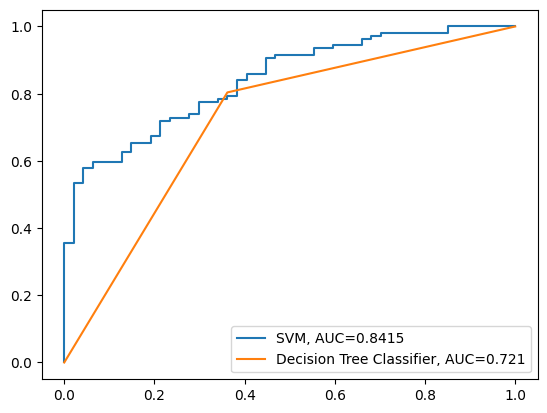

In [38]:
#set up plotting area
plt.figure(0).clf()

# Diabetes SVM vs Tree

# Create dataset
X, y = df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values

#split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#fit logistic regression model and plot ROC curve
model = SVC(probability=True)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

#add legend
plt.legend()
plt.show()

In [1]:
!pip install orange3
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [ ]:
import Orange
import Orange.evaluation
import matplotlib.pyplot as plt
names = ["first", "third", "second", "fourth" ]
avranks =  [1.9, 3.2, 2.8, 3.3 ]
cd = Orange.evaluation.compute_CD(avranks, 30) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show()

In [ ]:
from statsmodels.stats.libqsturng import qsturng

alpha = 0.05
n_datasets = 10
n_methods = 3

q_alpha = qsturng(1 - alpha, n_methods, np.inf) / np.sqrt(2)
cd = q_alpha * np.sqrt(n_methods * (n_methods + 1) / (6 * n_datasets))

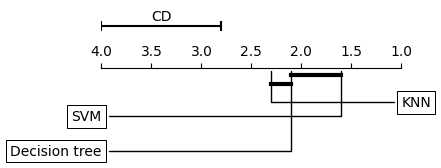

In [8]:
import matplotlib.pyplot as plt

# input data
c = 1.6
ccf = 2.1
cmcf = 2.3

limits=(4,1)

fig, ax = plt.subplots(figsize=(5,1.8))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k")
ax.text(limits[0]-cd/2., 0.92, "CD", ha="center", va="bottom")

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90", color='black')
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate("SVM", xy=(c, 0.6), xytext=(0,0.25),ha="right",  **kw)
ax.annotate("Decision tree", xy=(ccf, 0.6), xytext=(0,0),ha="right",  **kw)
ax.annotate("KNN", xy=(cmcf, 0.6), xytext=(1.,0.35),ha="left",  **kw)

#bars
ax.plot([ccf,c],[0.55,0.55], color="k", lw=3)
ax.plot([ccf,cmcf],[0.48,0.48], color="k", lw=3)

plt.show()


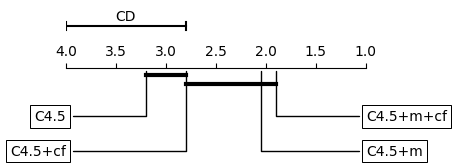

In [7]:
import matplotlib.pyplot as plt

# input data
cd = 1.2
c = 3.2
ccf = 2.8
cmcf = 1.9
cm = 2.05

limits=(4,1)

fig, ax = plt.subplots(figsize=(5,1.8))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k")
ax.text(limits[0]-cd/2., 0.92, "CD", ha="center", va="bottom")

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate("C4.5", xy=(c, 0.6), xytext=(0,0.25),ha="right",  **kw)
ax.annotate("C4.5+cf", xy=(ccf, 0.6), xytext=(0,0),ha="right",  **kw)
ax.annotate("C4.5+m+cf", xy=(cmcf, 0.6), xytext=(1.,0.25),ha="left",  **kw)
ax.annotate("C4.5+m", xy=(cm, 0.6), xytext=(1.,0),ha="left",  **kw)

#bars
ax.plot([ccf,c],[0.55,0.55], color="k", lw=3)
ax.plot([ccf,cmcf],[0.48,0.48], color="k", lw=3)

plt.show()